<a href="https://colab.research.google.com/github/JLongStem3/Image-Detection-ASL-USD_MS_AAI-521/blob/main/ASL_E2E_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASL Model Evaluation

## Imports

In [ ]:
from base64 import b64decode
import cv2
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import imutils
from IPython.display import display, Javascript
import kagglehub
import pandas as pd
import numpy as np
import string
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Part 1: Load and Evaluate Model

### 1.1 Load Test Data from Kaggle and Preprocess

In [ ]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

# Load training and testing data
train_data = pd.read_csv(f"{path}/sign_mnist_train.csv")
test_data = pd.read_csv(f"{path}/sign_mnist_test.csv")

100%|██████████| 62.6M/62.6M [00:00<00:00, 122MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [ ]:
# Define constants for data handling
BATCH_SIZE = 32
IMG_HEIGHT = 96
IMG_WIDTH = 96
NUM_CLASSES = 25

# Create tf.data.Dataset for Training and Test Data
def preprocess_image(image, label):
    # Reshape to 28x28 and add channel dimension
    image = tf.reshape(image, [28, 28, 1])
    # Resize to 96x96
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    # Convert grayscale (1 channel) to RGB (3 channels)
    image = tf.image.grayscale_to_rgb(image)
    # Normalize pixel values
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def load_dataset_from_dataframe(dataframe):
    # Extract features and labels
    labels = dataframe.iloc[:, 0].values
    images = dataframe.iloc[:, 1:].values

    # Convert labels to one-hot encoding
    labels = tf.keras.utils.to_categorical(labels, NUM_CLASSES)

    # Create TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.map(lambda x, y: (tf.cast(x, tf.float32), tf.cast(y, tf.float32)))
    dataset = dataset.map(preprocess_image)
    dataset = dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [ ]:
test_dataset = load_dataset_from_dataframe(test_data)

### 1.2 Load Saved Model from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

models_folder = "/content/drive/My Drive/AAI 521 - Group 7/Models"

!ls "{models_folder}"

Mounted at /content/drive
 hyperband_test_1   hyperband_test_3   model_01.keras
 hyperband_test_2   model_01.h5       'Model Descriptions.gsheet'


In [ ]:
# Load saved model
model = tf.keras.models.load_model(models_folder + "/model_01.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 144 variables whereas the saved optimizer has 286 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### 1.3 Confusion Matrix Evaluation on Test Dataset

In [ ]:
import numpy as np

# List to store true labels and predictions
y_test = []
y_pred = []

# Iterate over the test dataset
for images, labels in test_dataset:
    # Get model predictions
    preds = model.predict(images, verbose=0)  # Outputs probabilities
    y_pred.extend(np.argmax(preds, axis=1))  # Convert to class indices
    y_test.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to class indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━

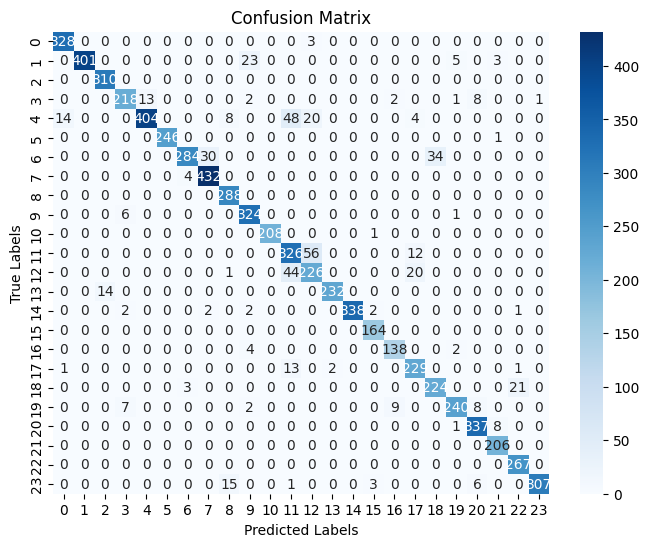

In [ ]:
# Build a confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Part 2: Full pipeline evaluation

### 2.1 Evaluate samples from test dataset

In [ ]:
# Create tf.data.Dataset for Training and Test Data
IMG_HEIGHT = 96
IMG_WIDTH = 96
NUM_CLASSES = 25

def preprocess_raw_image(image):
    # Check if the input is a file path
    if isinstance(image, str):
        # Read the image from file
        image = tf.io.read_file(image)
        image = tf.image.decode_image(image, channels=3)  # Decode as RGB

        # Change to grayscale as the model expects that
        image = tf.image.rgb_to_grayscale(image)


    elif isinstance(image, np.ndarray):
        image = tf.convert_to_tensor(image, dtype=tf.float32)
        # Reshape to add channel dimension if necessary
        if image.ndim == 2:  # If grayscale
            image = tf.expand_dims(image, axis=-1)
            image = tf.image.grayscale_to_rgb(image)

    # Ensure the image has 3 channels (RGB)
    if image.shape[-1] == 1:  # Grayscale image
        image = tf.image.grayscale_to_rgb(image)

    # First scale down to dataset dimensions
    image = tf.image.resize(image, [28, 28])

    # Resize to target dimensions
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])

    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    # Display image

    plt.imshow(image.numpy())
    plt.axis('off')
    plt.show()

    return image

Randomly sample from test dataset

In [ ]:
# Pull one sample image from test dataset

# select random image from test data
test_image = test_data.sample(1)

image = test_image.iloc[0, 1:].values.reshape(28, 28)
label = test_image.iloc[0, 0]

Make prediction on test image

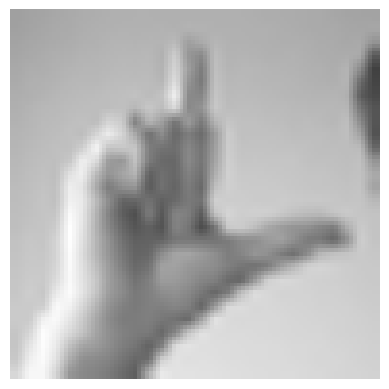

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
tf.Tensor(11, shape=(), dtype=int64)
Predicted Label: 11
True Label: 11


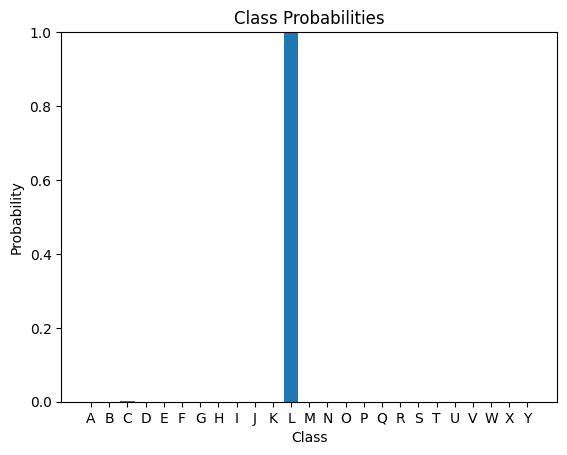

In [ ]:
test_image = preprocess_image(image)

input = tf.expand_dims(test_image, axis=0)
preds = model.predict(input)
pred_label = tf.argmax(preds[0])
print(pred_label)

probabilities = preds[0]

class_labels = list(string.ascii_uppercase[:len(probabilities)])

plt.bar(class_labels, probabilities)
plt.title("Class Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.ylim([0, 1])

print(f"Predicted Label: {pred_label}")
print("True Label:", label)
plt.show()

### 2.2 Evaluate image from webcam

(Based on Assignment4_template.ipynb provided as part of AAI521 Fall 2024 Course Materials)

In [ ]:
# Capture an image

#b- Working on webcam
#Function to activate your laptop cam. This function is comp;ete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Test image recognition from webcam

<IPython.core.display.Javascript object>

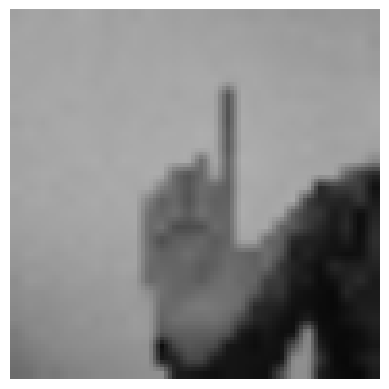

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
tf.Tensor(11, shape=(), dtype=int64)


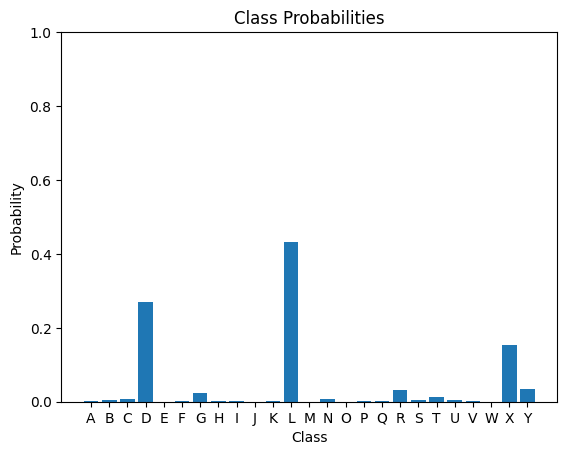

In [ ]:
test_photo = take_photo()

input = preprocess_image(test_photo)
input = tf.expand_dims(input, axis=0)
preds = model.predict(input)
pred_label = tf.argmax(preds[0])
print(pred_label)

probabilities = preds[0]

class_labels = list(string.ascii_uppercase[:len(probabilities)])

plt.bar(class_labels, probabilities)
plt.title("Class Probabilities")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.ylim([0, 1])

plt.show()